# Chapter 2: Ladder of Causality, From Data Observation to What Could Have Been

## Key Points Learned in this Chapter:

### 1. Pearl's Ladder of Causality:
* Introduction to the three levels of causal reasoning: observation (association), intervention, and counterfactuals, each offering progressively deeper insights into cause-and-effect relationships.

### 2. Observational Studies:
* Explanation of the limitations of observational data, such as confounding variables and the inability to infer causation from correlation alone.
    
### 3. Interventions and the Do-operator:
* Understanding how interventions, formalized through Pearl's do-operator, enable us to actively manipulate variables in a system and determine causal effects.

### 4. Counterfactuals:
* Exploration of counterfactual reasoning, which involves imagining alternative scenarios and outcomes, and learning the three-step process for computing counterfactuals: abduction, modification, and prediction.

### 5. Structural Causal Models (SCMs):
* Introduction to SCMs as a powerful framework for representing and analyzing causal relationships, with the capability to model both interventions and counterfactuals.


## Introduction

In this chapter, we will explore the fundamental concepts of causal inference as framed by Judea Pearl's Ladder of Causality. 
This approach helps us understand the different levels of reasoning about cause-and-effect relationships, from mere observations 
to counterfactuals that allow us to infer 'what could have been.' This chapter is structured into three main sections, each covering 
a rung of the Ladder of Causality: 


1. **Observation (Association):** Observing and predicting based on passive observations. In more math words, Understanding how to find associations from observational data.
2. **Intervention (Doing):** Understanding the effects of actions or manipulations. In more math words, How to use interventions to infer causality.
3. **Counterfactuals (Imagining):** Reasoning about what could have happened under different circumstances. In more math words, Using counterfactuals to reason about alternative scenarios.


As we climb this ladder, we'll see how each level builds upon the previous one, providing deeper insights into causality and more powerful tools for decision-making.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import networkx as nx

# Set random seed for reproducibility
np.random.seed(42)

## 1. Association: Observing and Predicting

### 1.1 Introduction to Observational Data

The first rung of the causal ladder deals with passive observations - data we collect without intervening in the system we're studying. This is the realm of traditional statistics and machine learning.

At this level, we can:
- Describe the data
- Find patterns and correlations
- Make predictions based on observed relationships

However, we cannot make causal claims based solely on observational associations data. In the last chapter, we learnt that associations are often represented by correlation, but correlation does not imply causation.


### 1.2 Example: Correlation between Education level and Income

Let's explore the relationship between two variables using a classic example: the connection between education level and income.

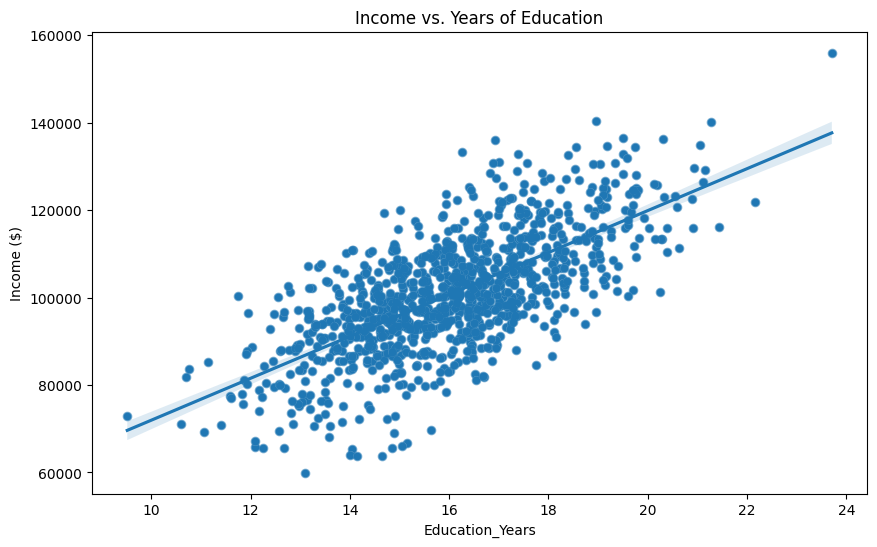

Correlation between Education and Income: 0.69
Regression equation: Income = 24008.51 + 4794.24 * Education_Years
R-squared: 0.47


In [58]:
# Generate synthetic data
n = 1000
education_years = np.random.normal(16, 2, n)  # Mean of 16 years, std dev of 2
income = 20000 + 5000 * education_years + np.random.normal(0, 10000, n)

data = pd.DataFrame({
    'Education_Years': education_years,
    'Income': income
})

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Education_Years', y='Income', data=data)
plt.title('Income vs. Years of Education')
plt.xlabel('Years of Education')
sns.regplot(x='Education_Years', y='Income', data=data, scatter_kws={'alpha':0.5})  # Corrected column names
plt.ylabel('Income ($)')
plt.show()

# Calculate correlation
correlation = data['Education_Years'].corr(data['Income'])
print(f"Correlation between Education and Income: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Education_Years'], data['Income'])

print(f"Regression equation: Income = {intercept:.2f} + {slope:.2f} * Education_Years")
print(f"R-squared: {r_value**2:.2f}")


This example demonstrates how we can use observational data to find patterns and make predictions. We see a positive correlation between years of education and income, and we can use the regression equation to predict income based on education level.

The 2023 statistics from the U.S. Bureau of Labor Statistics show a positive relationship between education and earnings. Higher education levels, like doctoral or professional degrees, correspond to significantly higher weekly earnings, over 2,100 USD, compared to less than 900 USD for those with a high school diploma or less. Additionally, unemployment rates decrease with higher education, reflecting both higher income and job stability as educational attainment increases [Source](https://www.bls.gov/emp/chart-unemployment-earnings-education.htm).

<img src="img/ch2/Earnings_Education_US_2023.png" alt="Earnings and Education"/>


### 1.3 Limitations of Observational Studies

While observational studies are valuable, they have important limitations:

1. **Confounding**: Other variables might influence both education and income, leading to a spurious correlation.
2. **Selection Bias**: Our sample might not be representative of the entire population.
3. **Reverse Causality**: Higher income might enable more education, rather than education causing higher income.

Most importantly, correlation does not imply causation. We cannot conclude from this data alone that increasing education will cause an increase in income.

### 1.4 Example: A Confounding Factor behind Education and Income

To illustrate these limitations, let's consider a hypothetical scenario where we have data on family background, education, and income:

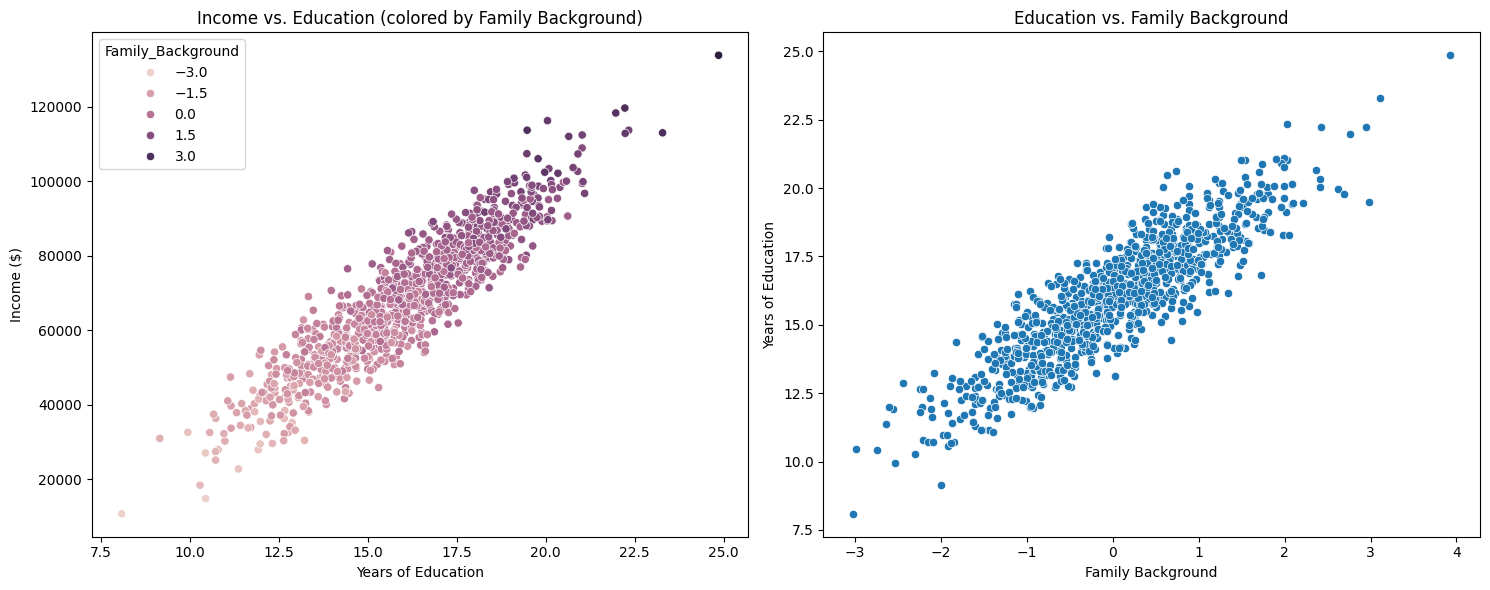

Partial Correlations:
                   Family_Background  Education_Years    Income
Family_Background           1.000000         0.888571  0.938376
Education_Years             0.888571         1.000000  0.919263
Income                      0.938376         0.919263  1.000000


In [60]:
# Generate synthetic data with a confounding variable
n = 1000
family_background = np.random.normal(0, 1, n)
education_years = 16 + 2 * family_background + np.random.normal(0, 1, n)
income = 20000 + 3000 * education_years + 10000 * family_background + np.random.normal(0, 5000, n)

data = pd.DataFrame({
    'Family_Background': family_background,
    'Education_Years': education_years,
    'Income': income
})

# Plot the relationships
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Education_Years', y='Income', hue='Family_Background', data=data, ax=ax1)
ax1.set_title('Income vs. Education (colored by Family Background)')
ax1.set_xlabel('Years of Education')
ax1.set_ylabel('Income ($)')

sns.scatterplot(x='Family_Background', y='Education_Years', data=data, ax=ax2)
ax2.set_title('Education vs. Family Background')
ax2.set_xlabel('Family Background')
ax2.set_ylabel('Years of Education')

plt.tight_layout()
plt.show()

# Calculate partial correlations
partial_corr = pd.DataFrame(np.corrcoef(data.values.T), columns=data.columns, index=data.columns)
print("Partial Correlations:")
print(partial_corr)

In this example, family background influences both education and income. When we account for this confounding variable, the relationship between education and income weakens. This demonstrates how observational data alone can be misleading when trying to infer causal relationships.

To better understand potential causal relationships, we can use **Directed Acyclic Graphs (DAGs)**. We will talk more explicitly about DAGs in the next chapter. But for now, here's a simple DAG for our education-income example:

This DAG illustrates potential causal pathways, showing that family background might influence both education level and income, while education level might also influence income.

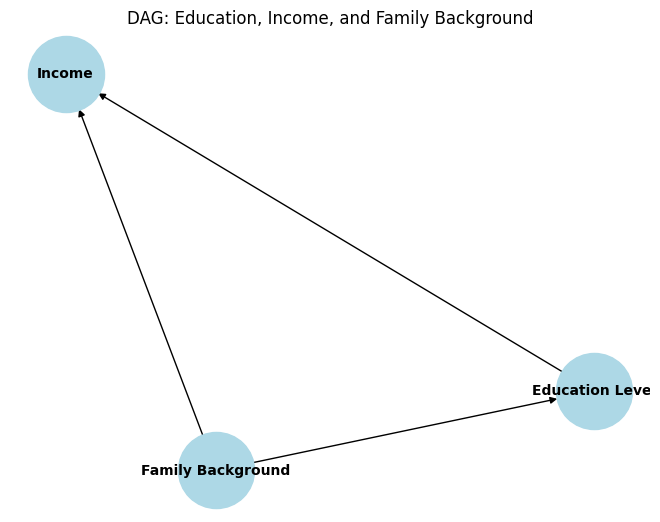

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ('Family Background', 'Education Level'),
    ('Education Level', 'Income'),
    ('Family Background', 'Income')
])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrows=True)
plt.title("DAG: Education, Income, and Family Background")
plt.show()


### 1.5 Quantifying Associational Relationships
To quantify associational relationships, we use conditional probability. This mathematical tool allows us to express the likelihood of one event occurring given that another event has already occurred.

### Conditional Probability

Conditional probability is defined as the probability of an event A, given that another event B has occurred. It is expressed mathematically as:

$P(A|B) = \frac{P(A \cap B)}{P(B)}$
Where:

* $P(A|B)$ is the probability of A given B
* $P(A \cap B)$ is the probability of both A and B occurring
* $P(B)$ is the probability of B occurring

<font color='blue'>**Remember!**</font> While conditional probability is useful for quantifying associations, it has limitations when inferring causality:

* **Direction of causality**: Conditional probability doesn't indicate whether A causes B, B causes A, or if there's a third factor causing both.
* **Confounding variables**: It doesn't account for unobserved variables that might influence both events.
* **Selection bias**: The observed association might be due to how the data was collected rather than a true relationship in the population.

Let's implement our educational level and income example using Python:

<br/><br/>

In [64]:
import numpy as np
import pandas as pd

# Generate synthetic data with a confounding variable
n = 1000
np.random.seed(42)  # For reproducibility
family_background = np.random.normal(0, 1, n)
education_years = 16 + 2 * family_background + np.random.normal(0, 1, n)
income = 20000 + 3000 * education_years + 10000 * family_background + np.random.normal(0, 5000, n)

data = pd.DataFrame({
    'Family_Background': family_background,
    'Education_Years': education_years,
    'Income': income
})

# Step 1: Discretize the continuous variables into categories (Low/High)
# For each variable, use qcut to create 2 bins
data['Education_Level'] = pd.qcut(data['Education_Years'], 2, labels=['Low Education', 'High Education'])
data['Family_Background_Level'] = pd.qcut(data['Family_Background'], 2, labels=['Low Background', 'High Background'])
data['Income_Level'] = pd.qcut(data['Income'], 2, labels=['Low Income', 'High Income'])

# Step 2: Calculate conditional probabilities

# P(Income Level | Education Level)
conditional_prob_income_given_education = pd.crosstab(data['Income_Level'], data['Education_Level'], normalize='columns')

# P(Income Level | Family Background Level)
conditional_prob_income_given_family_background = pd.crosstab(data['Income_Level'], data['Family_Background_Level'], normalize='columns')

# P(Education Level | Family Background Level)
conditional_prob_education_given_family_background = pd.crosstab(data['Education_Level'], data['Family_Background_Level'], normalize='columns')

# Step 3: Print the conditional probability tables

print("Conditional Probability: P(Income Level | Education Level)")
print(conditional_prob_income_given_education)

print("\nConditional Probability: P(Income Level | Family Background Level)")
print(conditional_prob_income_given_family_background)

print("\nConditional Probability: P(Education Level | Family Background Level)")
print(conditional_prob_education_given_family_background)


Conditional Probability: P(Income Level | Education Level)
Education_Level  Low Education  High Education
Income_Level                                  
Low Income               0.858           0.142
High Income              0.142           0.858

Conditional Probability: P(Income Level | Family Background Level)
Family_Background_Level  Low Background  High Background
Income_Level                                            
Low Income                         0.89             0.11
High Income                        0.11             0.89

Conditional Probability: P(Education Level | Family Background Level)
Family_Background_Level  Low Background  High Background
Education_Level                                         
Low Education                     0.854            0.146
High Education                    0.146            0.854


**Key Insights**: 

$P(Income | Education Level)$: This indicates how much education influences income. For example, having high education may significantly increase the probability of having high income.

$P(Income | Family Background)$: This shows the impact of family background on income. You may observe that a better family background correlates with higher income levels.

$P(Education | Family Background)$: This explains the role of family background in determining education levels, showing how individuals from stronger family backgrounds tend to achieve higher education.

<br/>

## 2. Intervention: Taking Action or Doing

### 2.1 From Observation to Intervention

**Intervention** is a key concept in scientific experiments, where we change one variable and observe how it affects another. Unlike **conditioning**, which only alters our view of the data based on existing relationships, **intervening** actively changes the system itself. 

This process of intervention is formalized using the **do-operator**, introduced by Judea Pearl. The **do-operator** allows us to mathematically express what happens when a variable is forcibly set to a particular value, thus simulating the effect of an intervention in the system.

Mathematically, the do-operator is expressed as:

$$P(Y = 1 \mid do(X = 0))$$

This notation indicates the **probability of $Y$ being 1 when we intervene and set $X$ to 0**. Unlike conditional probability (which would observe how often $Y = 1$ when $X = 0$ naturally occurs), the do-operator explicitly tells us the outcome of forcing $X$ to 0.

#### The Crucial Distinction: Intervention vs. Conditioning

- **Intervention** modifies the system by actively **fixing a variable**, as in a controlled experiment. This requires the do-operator because it represents an external action imposed on the system.
  
- **Conditioning**, on the other hand, simply **filters the existing data** without altering the underlying causal relationships. In this case, we are only observing correlations between variables as they naturally occur.

#### Example:
- **Intervention (do-operator)**: $P(Y = 1 \mid do(X = 0))$ means *we intervene* and force $X = 0$, then observe the probability of $Y = 1$. This is akin to performing a medical trial where you force one group of patients to receive a specific treatment.
  
- **Conditioning**: $P(Y = 1 \mid X = 0)$ means we look at the **existing data** and observe how often $Y = 1$ when $X$ happens to be 0. This could be data from patients who, by chance, did not receive the treatment, but no intervention was applied.

This distinction is crucial because **conditioning** provides associations but not causal insights, while **intervention** helps uncover true cause-and-effect relationships.


### 2.2 Randomized Controlled Trials

The idea of intervention is frequently applied in controlled experiments or **Randomized Controlled Trials (RCTs)**. In RCTs, participants are randomly assigned to different groups (e.g., treatment and control), and researchers can intervene to administer treatments and observe causal effects.

The **do-operator** is the mathematical formalization of this experimental setup. By simulating what happens when variables are actively changed (as in RCTs), we can move from mere correlation to causal claims.


### 2.2 Example: RCT for a new job training program

Let's simulate an RCT to study the effect of introducing a new job training program on participants income:

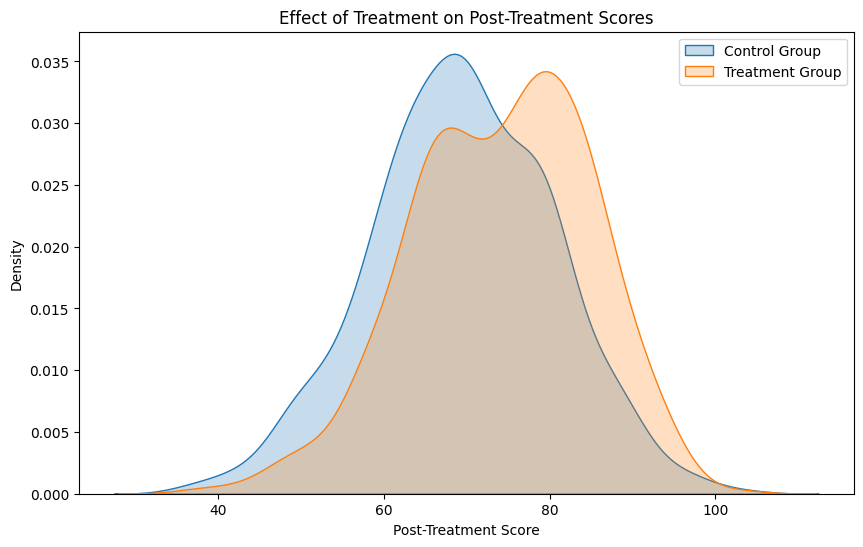

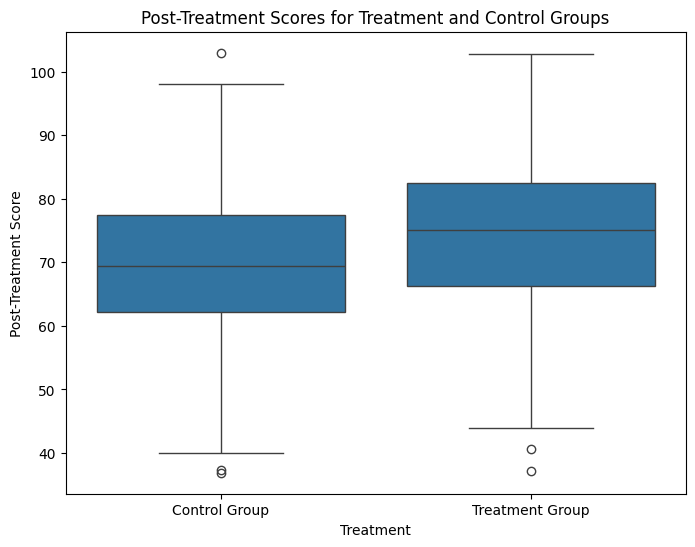

In [67]:
# Import necessary libraries
import numpy as np  # Import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate RCT data
n = 1000
treatment = np.random.binomial(1, 0.5, n)  # Treatment assignment (Randomized Control Trial)
baseline_score = np.random.normal(70, 10, n)  # Baseline scores
treatment_effect = 5  # Assume treatment effect is 5 points on average

# Post-treatment scores
post_treatment_score = baseline_score + treatment * treatment_effect + np.random.normal(0, 5, n)

# Create DataFrame
rct_data = pd.DataFrame({
    'Treatment': treatment,
    'Baseline Score': baseline_score,
    'Post-Treatment Score': post_treatment_score
})

# Plotting KDE for treatment and control groups
plt.figure(figsize=(10, 6))
sns.kdeplot(rct_data[rct_data['Treatment'] == 0]['Post-Treatment Score'], label='Control Group', fill=True)
sns.kdeplot(rct_data[rct_data['Treatment'] == 1]['Post-Treatment Score'], label='Treatment Group', fill=True)
plt.title('Effect of Treatment on Post-Treatment Scores')
plt.xlabel('Post-Treatment Score')
plt.legend()
plt.show()


# Boxplot comparison of Post-Treatment Scores between Treatment and Control
plt.figure(figsize=(8, 6))
sns.boxplot(x='Treatment', y='Post-Treatment Score', data=rct_data)
plt.title('Post-Treatment Scores for Treatment and Control Groups')
plt.xticks([0, 1], ['Control Group', 'Treatment Group'])
plt.show()


**This is an RCT, because:**

* **Random Assignment**: The participants are randomly assigned to the treatment or control group, which eliminates bias in group selection.
* **Control Group**: There is a control group (those who didn't receive the treatment) to compare against the treatment group.
* **Intervention**: The treatment effect is explicitly modeled and applied to the treatment group.
* **Outcome Measurement**: The post-treatment scores are used to measure the effect of the intervention, making it possible to observe the impact of the treatment.
  
This structure aligns with the core principles of an RCT, which aims to isolate the causal effect of an intervention by controlling for confounding variables through random assignment.

</br></br>


### 2.3 A/B Testing a tool for Do-operator

As we mentined, the do-operator formalizes the concept of intervention. $do(X=x)$ represents setting the value of $X$ to $x$, regardless of its natural causes.

The do-operator allows us to distinguish between:
* $P(Y|X=x)$ - The probability of $Y$ given that we observe $X=x$
* $P(Y|do(X=x))$ - The probability of $Y$ given that we intervene to set $X=x$

In an ideal RCT, $P(Y|do(X=x)) = P(Y|X=x)$ due to randomization.


**A/B testing**, also known as split testing, is a controlled experiment commonly used in business to compare two versions (A and B) of a product, webpage, or service to determine which one performs better in achieving a specific objective, such as increasing conversions, click-through rates, or user engagement.

* **Version A (Control)**: This is the original version or the current version of a product, service, or webpage that serves as the baseline. It's often referred to as the control group in the experiment.

* **Version B (Variant)**: This is the modified version where changes are made to test if it improves the desired outcome. This version represents the treatment or experimental group.

Users or participants are randomly assigned to either version A or version B. This ensures that any difference in outcomes is due to the change and not other external factors. The goal of A/B testing is to test a hypothesis. 

In A/B testing, we are deliberately intervening in a system by assigning different users (or units) to different "treatments" (**versions A and B**). This is equivalent to the **do-operator** in causal inference, which models interventions.

The do-operator is denoted as $do(X = x)$ represents an active intervention where the variable $X$ is set to a specific value, and all other causes of $X$ are ignored. In an A/B test, when we assign participants to the **treatment (version B)** or **control (version A)**, we are effectively doing a $do()$ operation on the version that a participant sees.


Let's look an A/B test example.

### Example: Freia Melkesjokolade and the Brunost Chocolate Experiment

[Freia](https://www.freia.no/tre-nye-freia-oppfinnerserien-plater), one of Norway’s most beloved chocolate factories, known for its classic Melkesjokolade, decided to push the boundaries of flavor by creating a new, experimental chocolate bar. They decided to combine their famous Melkesjokolade with another iconic Norwegian ingredient: [Brunost](https://en.wikipedia.org/wiki/Brunost) (brown cheese). Both Freia Melkesjokolade and Brunost are beloved on their own, but the company wasn't sure how customers would feel about the combination of the two flavors.

<img src="img/ch2/Freia-Melkesjokolade.png" alt="Freia-Melkesjokolade"/>

To find out, Freia decided to run an A/B test. They wanted to know if people would enjoy the Brunost-Chocolate bar as much as they enjoyed their classic Melkesjokolade.

The Test Was Set Up as follow:
* **Control Group (Version A)**: Half of the customers were given a free sample of the classic Freia Melkesjokolade.
* **Treatment Group (Version B)**: The other half of the customers were given a free sample of the new Brunost-Chocolate bar.
  
After the tasting, customers were asked whether they would buy the chocolate they sampled. Freia wanted to compare the conversion rates for the two groups—how many people said they would buy the classic Melkesjokolade versus the new Brunost-Chocolate.



Control (Classic Melkesjokolade) Conversion Rate: 31.02%
Treatment (Brunost-Chocolate) Conversion Rate: 19.06%
Lift (Change in Conversions): -38.55%


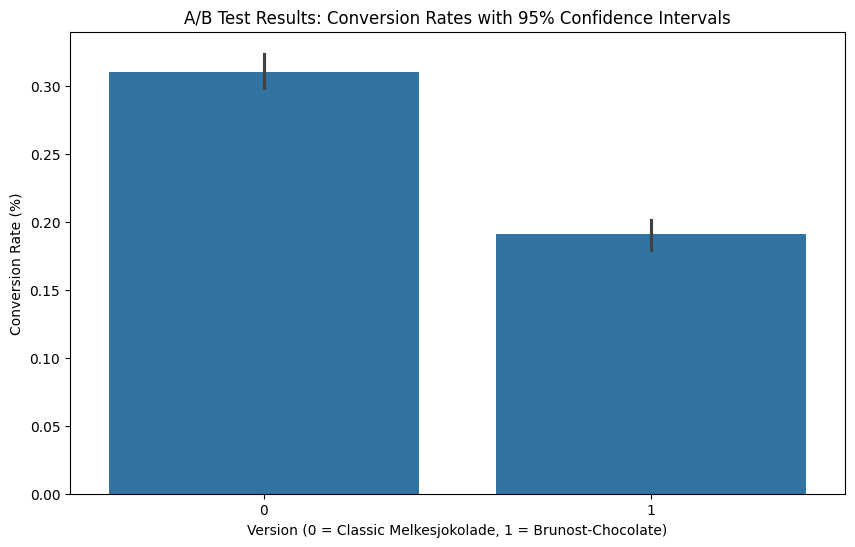

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate A/B test data for Freia's chocolate experiment
n = 10000  # Number of customers
version = np.random.binomial(1, 0.5, n)  # 50% of customers get the Brunost-Chocolate (Version B)
baseline_conversion = np.random.binomial(1, 0.3, n)  # 30% baseline conversion for classic Melkesjokolade (Version A)
treatment_effect = -0.1  # The Brunost-Chocolate is expected to have a 10% lower conversion rate
conversion = np.where(version == 1, 
                      np.random.binomial(1, 0.3 + treatment_effect, n),  # 20% conversion for Brunost-Chocolate
                      baseline_conversion)  # 30% conversion for classic Melkesjokolade

# Create DataFrame to store the test data
ab_data = pd.DataFrame({
    'Version': version,  # Version 0 = Classic Melkesjokolade, Version 1 = Brunost-Chocolate
    'Conversion': conversion  # Whether the customer said they would buy the chocolate
})

# Analyze results: Calculate the conversion rates for both versions
control_rate = ab_data[ab_data['Version'] == 0]['Conversion'].mean()  # Conversion rate for classic Melkesjokolade
treatment_rate = ab_data[ab_data['Version'] == 1]['Conversion'].mean()  # Conversion rate for Brunost-Chocolate
lift = (treatment_rate - control_rate) / control_rate  # Percent decrease (negative Lift)

# Print the results
print(f"Control (Classic Melkesjokolade) Conversion Rate: {control_rate:.2%}")
print(f"Treatment (Brunost-Chocolate) Conversion Rate: {treatment_rate:.2%}")
print(f"Lift (Change in Conversions): {lift:.2%}")

# Visualize the conversion rates with error bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Version', y='Conversion', data=ab_data, errorbar=('ci', 95))  # Use errorbar instead of ci
plt.title('A/B Test Results: Conversion Rates with 95% Confidence Intervals')
plt.xlabel('Version (0 = Classic Melkesjokolade, 1 = Brunost-Chocolate)')
plt.ylabel('Conversion Rate (%)')
plt.show()



**Interpretation of the Output**:

* **Control Conversion Rate (Classic Melkesjokolade)**: About 30% of customers who tried the classic Melkesjokolade said they would buy it.
* **Treatment Conversion Rate (Brunost-Chocolate)**: Only 20% of customers who tried the Brunost-Chocolate said they would buy it.
* **Lift**: There was a 33.32% decrease in the conversion rate for the Brunost-Chocolate compared to the classic Melkesjokolade.


The conversion rate measures the percentage of customers who said they would buy the chocolate after trying each version. The results of the A/B test clearly show that while both Melkesjokolade and Brunost are delicious on their own, combining them in a single product wasn't a hit with customers. With a 33% decrease in conversions, it's clear that people preferred the classic chocolate without the Brunost flavor. Freia might want to stick with its classic chocolate formula and explore other new flavors for future experiments.

BTW, this was an story!! 

### A/B Test with Do-Operator Formulation

Consider the A/B test on Freia's new chocolate:

We have two versions:
- **Version A:** Classic Melkesjokolade (Version = 0)
- **Version B:** Brunost-Chocolate (Version = 1)

We are interested in knowing whether showing the **Brunost-Chocolate** to customers causes an increase in **conversions** (purchases).

In terms of causal inference, we can model this relationship as:

$\text{Conversion} = f(\text{Version}, U)$

Where:
- **Version** is either 0 (classic chocolate) or 1 (Brunost-chocolate).
- **Conversion** is whether the customer purchased the chocolate or not.
- **U** includes all the other variables that might influence conversion (e.g., personal preferences, mood, time of day, etc.).

To compute the **causal effect** of showing **Brunost-Chocolate** on conversion, we are interested in the following expression:

$P(\text{Conversion} \mid \text{do(Version = 1)})$

In A/B testing, when we randomly assign customers to different versions, we are essentially performing a:

- $\text{do(Version = 1)}$ (showing Brunost-Chocolate), or
- $\text{do(Version = 0)}$ (showing classic Melkesjokolade)

This active intervention allows us to isolate the effect of **Version** on **Conversion**, free from confounders (variables that might otherwise influence both the decision to show a particular version and the likelihood of a conversion). This random assignment helps us estimate the true **causal effect** of showing the Brunost-Chocolate on conversion rates. We will learn more about confounders and ausal effect in next chapters.



## 2.4. Structural Causal Models (SCMs) for Understanding Interventions

To uncover causal relationships, we often need to perform **interventions**. One of the most powerful tools for simulating and understanding interventions is the **Structural Causal Model (SCM)**.

In this section, we brielfly introduce the concept of SCMs and later in the course, we will talk more about it.

### What is a Structural Causal Model (SCM)?

A **Structural Causal Model (SCM)** defines a set of equations that describe the causal relationships between variables in a system. SCMs allow us to express how one variable influences another through functions that represent direct causal effects. 

An SCM typically consists of:
1. **Endogenous variables:** Variables whose values are determined within the system based on other variables or external factors.
2. **Exogenous variables:** External noise variables representing random influences outside the system that affect the endogenous variables. Exogenous variables are also called **noise variables**.

### The Do-Operator in SCMs

The **do-operator**, $do(X = x)$, is used to simulate an intervention. The do-operator allows us to intervene on the system by forcibly setting a variable to a specific value, irrespective of its original causes, and observe how the other variables in the system respond.

### Example: SCM with Two Variables

Consider the following SCM where we have two variables, $A$ and $B$, which are influenced by exogenous noise terms $U_0$ and $U_1$:

$A = U_0$

$B = 5A + U_1$

Here:
- $A$ is influenced by the exogenous noise $U_0$.
- $B$ is a linear function of $A$, with additional noise from $U_1$.
- Both $U_0$ and $U_1$ are random variables.

We will first simulate this system under normal conditions, then perform an intervention by fixing $A$ at a specific value, and observe how the relationship between $A$ and $B$ changes.
    

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set the sample size
SAMPLE_SIZE = 100

# Generate the exogenous variables (noise terms)
np.random.seed(45)
U0 = np.random.randn(SAMPLE_SIZE)
U1 = np.random.randn(SAMPLE_SIZE)

# Define the endogenous variables
A = U0
B = 5 * A + U1

# Calculate the correlation between A and B before the intervention
r, p = stats.pearsonr(A, B)
print(f"Correlation between A and B before intervention: r = {r:.3f}, p = {p:.3f}")

# Calculate the mean and variance of B before the intervention
mean_B_before = np.mean(B)
var_B_before = np.var(B)
print(f"Mean of B before intervention: {mean_B_before:.3f}")
print(f"Variance of B before intervention: {var_B_before:.3f}")

# Simulate intervention: Fix A at a specific value (e.g., A = 1.5)
A_intervention = np.full(SAMPLE_SIZE, 1.5)
B_intervention = 5 * A_intervention + U1

# Calculate the mean and variance of B after the intervention
mean_B_after = np.mean(B_intervention)
var_B_after = np.var(B_intervention)
print(f"Mean of B after intervention: {mean_B_after:.3f}")
print(f"Variance of B after intervention: {var_B_after:.3f}")


# Scatter plot of A and B before the intervention
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(A, B, alpha=0.7, label="Before Intervention")
plt.title('Before Intervention: A vs. B')
plt.xlabel('A')
plt.ylabel('B')

# Scatter plot of A and B after the intervention
plt.subplot(1, 2, 2)
plt.scatter(A_intervention, B_intervention, alpha=0.7, color='r', label="After Intervention")
plt.title('After Intervention: A vs. B')
plt.xlabel('A (Intervened)')
plt.ylabel('B')

plt.tight_layout()
plt.show()


# Box plot comparing B before and after intervention
plt.figure(figsize=(8, 6))
plt.boxplot([B, B_intervention], tick_labels=['Before Intervention', 'After Intervention'])
plt.title('Comparison of B Before and After Intervention')
plt.ylabel('B Values')
plt.show()


### Interpretation of Results for the Two Variables System

1. **Before the intervention**: 
   - There is a strong positive correlation between $A$ and $B$, as expected from the linear relationship $B = 5A + U_1$. 
   - The noise $U_1$ adds some variability to $B$, but $A$ primarily drives the changes in $B$.

2. **After the intervention**:
   - When we fix $A$ to a constant value (1.5), the correlation between $A$ and $B$ disappears. This is because $A$ no longer varies, and the only variation in $B$ comes from the noise $U_1$.
   - The intervention changes the system, reducing the influence of $A$ on $B$ and demonstrating the power of interventions to alter causal relationships.
  

### Visulize the Two Variables SCM with Graphs

Now, we visualize the **Directed Acyclic Graphs (DAGs)** for the **before and after intervention** scenarios in a two-variable SCM example. 

We will represent the relationships between the variables using two DAGs: 

**Before Intervention DAG**:
The arrows show that:
- $U_0$ influences $A$
- $A$ influences $B$
- $U_1$ influences $B$
This DAG represents the standard system before we intervene.

**After Intervention DAG**:
After intervention, $A$ is fixed (i.e., we "intervene" by setting $A$ to a constant). As a result:
- $U_0$ no longer influences $A$, because $A$ is no longer generated from the system.
- However, $A$ still influences $B$, and $U_1$ still affects $B$.


In [ ]:
from graphviz import Digraph
from IPython.display import display

# DAG before the intervention
dot_before = Digraph()

# Add nodes for variables
dot_before.node('U0', 'U0 (Noise for A)')
dot_before.node('U1', 'U1 (Noise for B)')
dot_before.node('A', 'A')
dot_before.node('B', 'B')

# Add edges representing causal relationships before intervention
dot_before.edge('U0', 'A')  # U0 influences A
dot_before.edge('A', 'B')   # A influences B
dot_before.edge('U1', 'B')  # U1 influences B

# Display the DAG before intervention
print("DAG Before Intervention")
display(dot_before)

# DAG after the intervention (fixing A)
dot_after = Digraph()

# Add nodes for variables
dot_after.node('U1', 'U1 (Noise for B)')
dot_after.node('A', 'A (Fixed)')
dot_after.node('B', 'B')

# Add edges representing causal relationships after intervention
dot_after.edge('A', 'B')   # A (fixed) still influences B
dot_after.edge('U1', 'B')  # U1 influences B

# Display the DAG after intervention
print("DAG After Intervention")
display(dot_after)


This example demonstrates how **Structural Causal Models (SCMs)** can be used to simulate and analyze interventions. By intervening on one variable (using the do-operator), we can observe how the relationships between variables change, and better understand the causal structure of the system.

</br></br>

## 3. Counterfactuals: Imagining Alternatives

### 3.1 Beyond Intervention to "What If?"

Counterfactuals help us imagine alternative realities by asking, "What if things had happened differently?" Unlike interventions, which change one aspect of a system in the present, counterfactuals involve hypothetical or simulated interventions that assume a different state of the world. For example, answering "Would John have bought the chocolate if he had seen the ad?" requires knowledge of John's past environment and his taste.

Counterfactuals differ from interventions in that they can never be observed, and multiple counterfactual models can lead to the same interventional distribution, while yielding different outcomes. This highlights a key distinction: interventions can be directly tested, while counterfactuals explore hypothetical scenarios, revealing deeper layers of causal relationships.

We need some basic concepts to understand counterfactuals better.



### 3.2. Counterfactual Example: Classic Freia Melkesjokolade with Video Streaming Advertisements

Freia, the same well-known Norwegian chocolate brand, is conducting a new marketing campaign to promote their **Classic Melkesjokolade**. They are using video streaming services such as **Netflix** and **TV2** to advertise their product. Freia wants to explore how factors such as **taste score**, **price (in NOK)**, and whether a customer saw an advertisement on these video streaming services affect the likelihood of customers purchasing the chocolate.

In addition to analyzing the current situation, Freia is interested in a **counterfactual scenario**: *What if all customers had seen the advertisement on video streaming services like Netflix or TV2? Would that have increased sales?*

This example helps illustrate the concept of **counterfactuals** by exploring how changes in advertisement exposure could lead to different sales outcomes for Classic Melkesjokolade.

<img src="img/ch2/Freia_Melkesjokolade_2.png" alt="Freia_Melkesjokolade_2" width="500"/>

#### Step 1: Define Variables

- **Taste Score (T)**: A subjective rating (from 1 to 10) of how much customers like the taste of Melkesjokolade. Higher scores indicate greater liking (average around 8).
  
- **Price (P)**: The price of the chocolate, randomly assigned between **20 NOK and 60 NOK**.
  
- **Video Streaming Advertisement Seen (A)**: Whether a customer saw the advertisement on services like Netflix or TV2 (binary: 1 for yes, 0 for no).
  
- **Purchase (Y)**: Whether the customer decided to buy the chocolate (binary: 1 for yes, 0 for no).

---

### Step 2: Mathematical Formulation

The purchase decision is modeled using the following formula:

$$
P(	ext{Purchase}) = 0.3 + 0.4 \cdot 	ext{Taste Score} + 0.5 \cdot 	ext{Ad Seen} - 0.1 \cdot 	ext{Price}
$$

Where:
- **Taste Score**: Increases the likelihood of purchase. A higher taste score increases the probability that a customer will buy the chocolate.
- **Ad Seen**: Adds to the probability of purchase. Customers who saw the ad on streaming services like Netflix or TV2 are more likely to buy.
- **Price**: Reduces the likelihood of purchase. Higher prices make it less likely for customers to buy the chocolate.

The probability is constrained between 0 and 1 using **`np.clip()`** to ensure it's a valid probability.

---

### Step 3: Simulate Data and Counterfactual Query

We simulate 5000 customers, each with a taste score, price (in NOK), and whether they saw the advertisement on a video streaming service. Then, we calculate how likely each customer was to purchase the chocolate based on these factors.

After analyzing the actual results, we'll create a **counterfactual scenario** where we assume **every customer saw the advertisement on Netflix or TV2**. We’ll then compare the actual and counterfactual outcomes to see if more customers would have purchased the chocolate.
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger sample size to smooth out volatility
np.random.seed(42)
n = 5000  # Increased sample size

# Generate the variables
taste_score = np.random.normal(8, 1.5, n)  # Taste score for Melkesjokolade, normally around 8
price = np.random.uniform(20, 60, n)       # Price between 20 NOK and 60 NOK
ad_seen = np.random.binomial(1, 0.5, n)    # 50% of customers saw the ad on Netflix or TV2

# Adjust coefficients
purchase_prob = 0.3 + 0.4 * taste_score + 0.5 * ad_seen - 0.1 * price
purchase_prob = np.clip(purchase_prob, 0, 1)  # Ensure probabilities are between 0 and 1
purchase = np.random.binomial(1, purchase_prob)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Taste_Score': taste_score,
    'Price': price,
    'Ad_Seen': ad_seen,
    'Purchase': purchase
})

# Analyze baseline purchase rates
baseline_rate = data['Purchase'].mean()
print(f"Baseline Purchase Rate: {baseline_rate:.2%}")

# Simulate a counterfactual scenario: What if all customers had seen the ad on Netflix or TV2?
data_cf = data.copy()
data_cf['Ad_Seen'] = 1  # Counterfactual: assume everyone saw the ad on Netflix or TV2

# Recalculate purchase probabilities under the counterfactual
data_cf['Counterfactual_Purchase_Prob'] = 0.3 + 0.4 * data_cf['Taste_Score'] + 0.5 * data_cf['Ad_Seen'] - 0.1 * data_cf['Price']
data_cf['Counterfactual_Purchase_Prob'] = np.clip(data_cf['Counterfactual_Purchase_Prob'], 0, 1)

# Calculate the mean counterfactual purchase probability
counterfactual_rate = data_cf['Counterfactual_Purchase_Prob'].mean()
print(f"Counterfactual Purchase Rate (if all saw Netflix/TV2 ad): {counterfactual_rate:.2%}")

# Create a bar plot to compare the actual vs. counterfactual purchase rates
plt.figure(figsize=(8, 6))
plt.bar(['Actual Purchase Rate', 'Counterfactual Purchase Rate'], 
        [baseline_rate * 100, counterfactual_rate * 100], 
        color=['blue', 'red'])

plt.title('Comparison of Actual vs. Counterfactual Purchase Rates')
plt.ylabel('Purchase Rate (%)')
plt.ylim(0, 50)  # Set the y-limit for better visual comparison
plt.show()

# Sort data by price to plot cumulative purchase rates
data_sorted = data.sort_values('Price')
data_cf_sorted = data_cf.sort_values('Price')

# Apply smoothing to cumulative purchase rates using a rolling window
window_size = 100  # Set the rolling window size for smoothing

# Plot cumulative purchase rates over price (with rolling mean smoothing)
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['Price'], 
         pd.Series(np.cumsum(data_sorted['Purchase']) / np.arange(1, len(data_sorted) + 1)).rolling(window_size).mean(), 
         label='Actual Purchase Rate (Smoothed)', color='blue')
plt.plot(data_cf_sorted['Price'], 
         pd.Series(np.cumsum(data_cf_sorted['Counterfactual_Purchase_Prob']) / np.arange(1, len(data_cf_sorted) + 1)).rolling(window_size).mean(), 
         label='Counterfactual Purchase Rate (Smoothed)', color='red')

plt.title('Cumulative Purchase Rate Over Price (Smoothed)')
plt.xlabel('Price (NOK)')
plt.ylabel('Cumulative Purchase Rate')
plt.legend()
plt.show()


#### Step 4: Explanation of Results

#### Baseline Purchase Rate:
The **baseline purchase rate** gives us the overall percentage of customers who purchased **Classic Melkesjokolade** in the real-world scenario, where only 50% of the customers saw the advertisement on streaming platforms like Netflix or TV2.

#### Counterfactual Purchase Rate:
In the counterfactual scenario, we assume that **all customers saw the advertisement**. The counterfactual purchase rate tells us what the purchase rate **would have been** if everyone had seen the ad.

#### Bar Plot:
The bar plot shows the overall purchase rates in both the actual and counterfactual scenarios. It highlights the fact that advertisement exposure has a positive causal effect on purchases. If everyone had seen the ad, the purchase rate would have increased.

#### Line Plot:
The cumulative purchase rate plot breaks down how price affects purchases and shows the cumulative effect of the advertisement.
The red line (counterfactual) being consistently higher than the blue line (actual) confirms that seeing the ad increases the likelihood of purchase, regardless of the price.

#### Step 5: DAG Represetaion

We also create a DAG to represent the relationships between taste score, price, and advertisement (ad seen) variables both for the actual and counterfactual cases.

* In the **actual scenario**:
    * Taste Score ($T$), Price ($P$), and Ad Seen ($A$) all directly influence the Purchase Decision ($Y$).

* In the **counterfactual scenario**:
    * We fix the Ad Seen ($A$) variable to $1$ for all customers (as if all saw the ad), which alters the outcome of Purchase ($Y$).


In [ ]:
from graphviz import Digraph
from IPython.display import Image

# Create a DAG to represent the causal structure of the counterfactual example
dot = Digraph()

# Add nodes for variables
dot.node('T', 'Taste Score (T)')
dot.node('P', 'Price (P)')
dot.node('A', 'Ad Seen (A)')
dot.node('Y', 'Purchase (Y)')

# Add edges representing causal relationships in the actual world
dot.edge('T', 'Y')  # Taste Score influences Purchase
dot.edge('P', 'Y')  # Price influences Purchase
dot.edge('A', 'Y')  # Ad Seen influences Purchase

# Render the DAG to a file and display it directly in the notebook
dag_path = 'Counterfactual_DAG'

# Save the DAG as a PNG image
dot.render(dag_path, format='png')

# Display the DAG image in the Jupyter Notebook
Image(filename=dag_path + '.png')


</br></br>

## 3.3. The Fundamental Problem of Causal Inference and Computing Counterfactuals:

Counterfactuals highlight a significant challenge in causal inference: we can never observe the same individual or object receiving two mutually exclusive treatments under the same circumstances at the same time. This is known as the **fundamental problem of causal inference** (Holland, 1986). [Source](https://www.oreilly.com/library/view/causal-inference-and/9781804612989/).

For example, we cannot simultaneously observe a customer who both saw and did not see an advertisement, making it impossible to directly observe both the actual and counterfactual outcomes. So, *how can we compute counterfactuals, given this inherent limitation?*

Despite this challenge, it is possible to compute counterfactuals *under certain conditions*. The basic idea is that counterfactuals can be computed when we have a **fully specified Structural Causal Model (SCM)**.

But what does a fully specified SCM mean? It means we need to:

* Have full knowledge of the functions that relate the relevant variables in the SCM.
* Have full knowledge of the exogenous variables (the noise or randomness in the system).

Once we have this information, we can simulate counterfactual scenarios by modifying the treatment or intervention in the system and observing the potential outcome. 
In simpler terms, if we know how the system works (via the structural equations), we can compute the hidden factors (noise variables) in the first step of computing counterfactuals, also known as the abduction step.

## 3.4. Steps for Computing Counterfactuals:
Judea Pearl and colleagues (Pearl, Glymour, and Jewell, 2016) proposed a three-step framework for computing counterfactuals in thier book, [Causal Inference in Statistics: A Primer](https://www.wiley.com/en-us/Causal+Inference+in+Statistics%3A+A+Primer-p-9781119186847):

* **Abduction**: Using observed data (**evidence**) to infer the values of the exogenous variables (noise terms) in the model. This step allows us to figure out the specific characteristics that define a particular individual or scenario.

* **Modification**: Replace the structural equation for the treatment or intervention with a counterfactual value. This step is sometimes referred to as the **action step**. Here, we alter the system by hypothetically changing one of the key variables in the SCM or modifieing SCM, such as assuming all customers saw an advertisement.

* **Prediction**: Use the **modified SCM** to compute the new outcome under the counterfactual scenario. With the modified equation, we can now simulate what would have happened under the alternate reality and observe how the outcome changes.

</br></br>

## 4. Connecting All Rungs: A Unified View of Causality

<img src="img/ch2/Pearls-Ladder-of-Causation.png" alt="Ladder-of-Causation"/>

[Image source](https://arxiv.org/abs/2201.05216)

### 4.1 The Hierarchy of Causal Queries

Pearl's Ladder of Causality shows a clear hierarchy in the types of questions we can answer:

1. **Observation**: What is? How would seeing $X$ change my belief in $Y$?
2. **Intervention**: What if? How would changing $X$ affect $Y$?
3. **Counterfactual**: Why? What if I had done something different?


### 4.2 Different Types of Queries: Observation, Intervention, and Counterfactual

In causal inference, we often ask questions that fall into three distinct categories: **observational**, **interventional**, and **counterfactual**. These queries correspond to different levels of Judea Pearl’s Ladder of Causality. Each query requires a different set of assumptions, data, and inference techniques. 

Let's explore how each of these queries is represented in terms of **SCMs** (Structural Causal Models), **Joint Distributions**, and **Conditional Queries**.

### Observational Queries $ P(y | x) $

Observational queries deal with data that is passively collected without any intervention. We observe the relationship between $ X $ and $ Y $, and ask how the value of $ Y $ depends on $ X $.

- **SCM**: The structural causal model assumes that both $ X $ and $ Z $ (a potential confounder) influence $ Y $. There are direct edges from both $ X $ and $ Z $ to $ Y $, representing natural relationships in the world.

- **Joint Distribution**: The joint distribution of $ X $, $ Z $, and $ Y $ is derived from the observable data. No interventions are applied, so the distribution reflects real-world conditions.

- **Conditional Query**: The conditional probability $ P(y | x) $ represents the likelihood of $ Y $ given a specific value of $ X $, based on observational data. This is often what we compute in machine learning models, but it does not imply a causal relationship between $ X $ and $ Y $.

- **Limitations**: Observational queries can reveal correlations but cannot determine causation due to potential confounding factors.


- **Examples**:

    * **Education and Income**: $P(Income | Education = 16 years)$, What's the probability distribution of income for those with 16 years of education?
      
    * **Marketing and Sales**: $P(Sales | Advertising = \$100,000)$, What's the probability distribution of sales for companies that spend $100,000 on advertising?

---
### Interventional Queries $ P(y | do(x)) $

Interventional queries ask what happens to $ Y $ when we intervene on $ X $ by setting it to a specific value. In this case, we are no longer just observing the data, but actively manipulating it to see how the outcome $ Y $ changes.

- **SCM**: In the interventional model, we intervene by manipulating $ X $, which breaks the relationship between $ X $ and its previous causes. This is shown in the SCM by removing the edge that influences $ X $ (i.e., cutting the edge from $ Z $ to $ X $).

- **Joint Distribution**: The joint distribution changes because we’ve intervened in the system, breaking the natural dependency structure. The dashed arrow in the interventional distribution shows that $ X $ is no longer influenced by $ Z $, but the relationship between $ X $ and $ Y $ still holds.

- **Conditional Query**: The interventional query $ P(y | do(x)) $ tells us what happens to $ Y $ when we force $ X $ to take on a specific value. This allows us to make causal claims, such as predicting what happens to income if we enforce 16 years of education for everyone.

- **Limitations**: Interventional queries require either experimental data or strong assumptions about the causal structure to be estimated from observational data.

- **Examples**:

    * **Education and Income**: $P(Income | do(Education = 16 years))$, What would the income distribution be if we enforced 16 years of education for everyone?
      
    * **Marketing and Sales**: $P(Sales | do(Advertising = \$100,000))$, What would the sales distribution be if we made every company spend $100,000 on advertising?
      
---
### Counterfactual Queries $ P(y_{x'} | X = x, Y = y) $

Counterfactual queries take it a step further by asking, *"What would have happened to $ Y $ if $ X $ had taken a different value?"*, even though we know what actually occurred. Counterfactual reasoning allows us to explore alternate realities and ask **what could have been**.

- **SCM**: The counterfactual model modifies the SCM by creating a "twin" version of reality, where we replace the actual value of $ X $ with an alternative value $ X' $, while holding other variables (e.g., $ Z $) constant. This twin model is the key to counterfactual reasoning, as it lets us imagine a different world where the intervention $ X' $ occurred instead of $ X $.

- **Joint Distribution**: The counterfactual joint distribution reflects how the relationships between variables change when we consider an alternate reality. Here, the relationship between $ X' $ and $ Y $ is different because it’s based on a hypothetical intervention.

- **Conditional Query**: The counterfactual query $ P(y_{x'} | X = x, Y = y) $ tells us what the outcome would have been if we had intervened with $ X' $, given that we observed $ X = x $ and $ Y = y $. For example, "What would the income have been if a person had completed 16 years of education, given that they only completed 12 and earn $40,000?"

- **Limitations**: Counterfactual queries require the strongest assumptions and are the most challenging to estimate from data. They often rely on detailed causal models and sensitivity analyses.

- **Examples**:

    * **Education and Income**: $P(Income\_16 | Education = 12, Income = \$40,000)$, What would the income have been if a person had completed 16 years of education, given that they only completed 12 and earn $40,000?
      
    * **Marketing and Sales**: $P(Sales\_200K | Advertising = \$100K, Sales = \$1M)$, What would the sales have been if a company had spent $\$200,000$ on advertising, given that they spent $\$100,000$ on advertising and had $\$1M$ in sales?

---

The diagram below illustrates the transition from observational to interventional and counterfactual queries:

<img src="img/ch2/Observation_Intervention_Counterfactual.png" alt="Observation to Intervention to Counterfactual"/>


### 4.3 Practical Implications for Data Scientists

Understanding these different levels of causal queries has significant practical implications:

* Research Design: Knowing the type of query you need to answer helps in designing appropriate studies (observational vs. experimental vs. analytical).
* Policy Making: Interventional and counterfactual reasoning are crucial for predicting the effects of new policies or interventions.
* Business Strategy: In marketing, product development, and other business areas, understanding causal relationships can lead to more effective strategies.
* Machine Learning: Moving beyond predictive models to causal models can lead to more robust and generalizable AI systems.


By mastering all three levels of causal reasoning, data scientists can provide more valuable insights and make better decisions.

## 5. Connecting to Other Concepts
This hierarchy of causal queries connects to several other important concepts in causal inference:

* Structural Causal Models (SCMs)
* Causal Graphs or Directed Acyclic Graphs (DAGs) 
* Causal Discovery Algorithms

In the next chapters, we'll learn about these concepts.
